In [2]:
%matplotlib inline

import copy
import glob
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.modeling import models

import scienceplots


In [3]:
import pandas as pd

cols = ['TIME(rel)', 'TIME(abs)', 'DEFAULT-RATE', 'NDETS', 'band0', 'band1', 'band2', 'band3', 'band4', 
           'BGband5', 'BGband6', 'BGband7', 'BGband8', 'BGband9', 'HR1', 'HR2']

df = pd.read_csv('js_ni1200120131_0mpu7_silver_GTI20-v3-bands.lc', header=None, names=cols, skiprows=19, sep='\s+')
df.head()

# lc = Lightcurve(times, counts, **opts)

,TIME(rel),TIME(abs),DEFAULT-RATE,NDETS,band0,band1,band2,band3,band4,BGband5,BGband6,BGband7,BGband8,BGband9,HR1,HR2
0,0.000,1.354035e+08,14664.0,47.0,6624.0,5608.0,1840.0,432.0,120.0,0.0,0.0,0.0,0.0,216.0,-0.072312,-1.185637
1,0.125,1.354035e+08,20016.0,47.0,8912.0,7760.0,2520.0,544.0,232.0,8.0,0.0,0.0,0.0,136.0,-0.060113,-1.035913
2,0.250,1.354035e+08,20080.0,47.0,8528.0,8120.0,2552.0,624.0,168.0,0.0,0.0,0.0,0.0,144.0,-0.021291,-1.181571
3,0.375,1.354035e+08,15808.0,47.0,7192.0,5792.0,2216.0,344.0,224.0,0.0,0.0,8.0,8.0,224.0,-0.094021,-0.995322
4,0.500,1.354035e+08,21120.0,47.0,9024.0,8400.0,2760.0,608.0,232.0,0.0,0.0,0.0,0.0,152.0,-0.031120,-1.075421


In [4]:
band0 = df['band0'] # 0.3-1 keV
band1 = df['band1'] #1-2
band2 = df['band2'] #2-4
band3 = df['band3'] #4-6
band4 = df['band4'] #6-12
t = df['TIME(rel)']
totalcts = band0+band1+band2+band3+band4


In [5]:
# allGTIs = glob.glob('./*.lc')
allGTIs = ['js_ni1200120131_0mpu7_silver_GTI25-v3-bands.lc']
print(allGTIs)
ct = 0
for f in allGTIs:
    df = pd.read_csv(f, header=None, names=cols, skiprows=19, sep='\s+')
    band0 = df['band0'] # 0.3-1 keV
    band1 = df['band1'] #1-2
    band2 = df['band2'] #2-4
    band3 = df['band3'] #4-6
    band4 = df['band4'] #6-12
    t = df['TIME(abs)']
    t-= 135401379.272
    totalcts = band0+band1+band2+band3+band4
    #%TODO make power spectrum from lc

    ct +=1
    


['js_ni1200120131_0mpu7_silver_GTI25-v3-bands.lc']


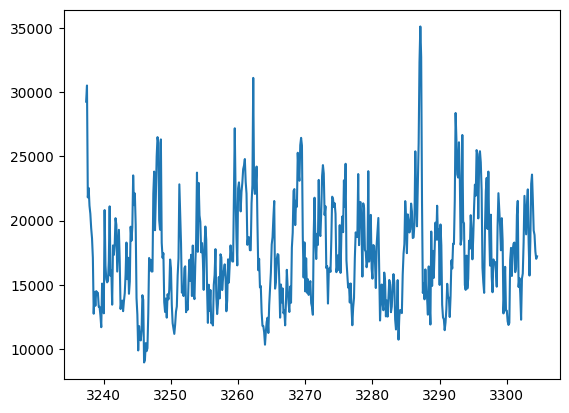

In [6]:
plt.plot(t, totalcts)


'stationarity' ie psds ~same across gtis bc time diff low enough expect same physics
want to take avg of PS acrc GTIs rather than making a giant lc

In [7]:
#TODO make a dynamical power spectrum

# HIPERCAM LC

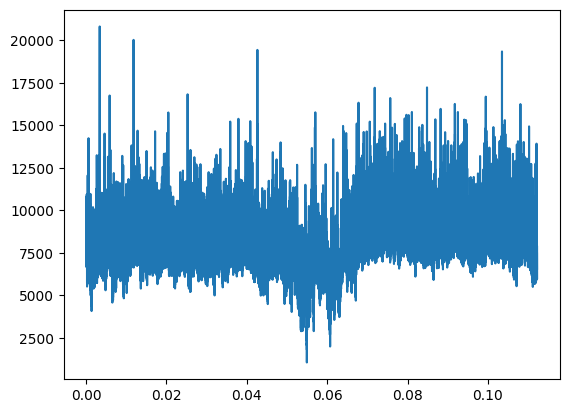

In [8]:
# paice hcam data
paicefile = '/Users/vberger/xrb/paice_data_hcam_maxij1820_april172018/1820_Apr17_bary2_corrected_g.csv'
hlc = pd.read_csv(paicefile, header=0, skiprows=0, sep=',')
plt.plot(hlc['Time_Bary']-hlc['Time_Bary'].iloc[0], hlc['Target_g'])


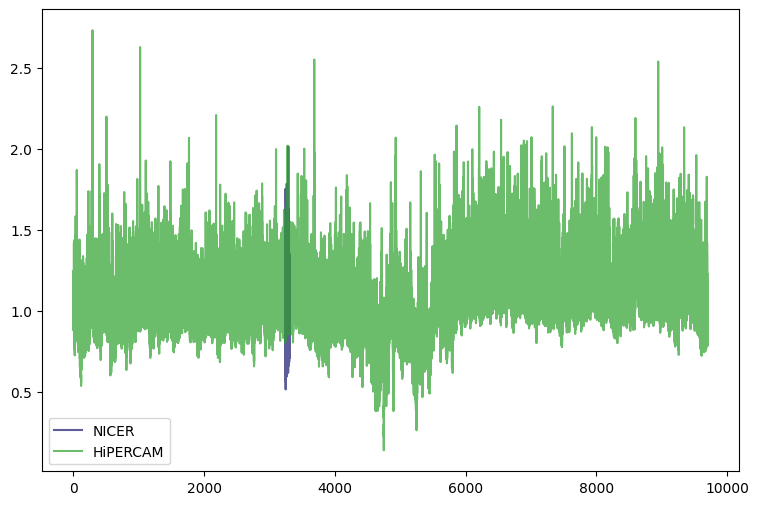

In [14]:
plt.figure(figsize=(9,6))
totalcts/=totalcts.mean()
hlc['Target_g']/=hlc['Target_g'].mean()
plt.plot(t, totalcts, alpha=0.7, color='midnightblue', label='NICER')

ht_s = (hlc['Time_Bary']-hlc['Time_Bary'][0])*3600*24
plt.plot(ht_s, hlc['Target_g'], alpha=0.7, color='tab:green', label='HiPERCAM')
# plt.xlim(3235, 3310)
plt.legend()


In [10]:
#t0 
# first hipercam obs is 58225.14557027361 MJD = 135401379.272 NICER time
# so subtract those times from both lcs and they will be aligned

# isolate the times that the nicer LC overlaps with the Hipercam times
# 


In [11]:
from stingray.gti import create_gti_from_condition, gti_border_bins, time_intervals_from_gtis, cross_two_gtis
from stingray.utils import show_progress
from stingray.fourier import avg_cs_from_events, avg_pds_from_events, poisson_level, get_average_ctrate
from stingray import AveragedPowerspectrum, AveragedCrossspectrum, EventList
from stingray.modeling.parameterestimation import PSDLogLikelihood
from stingray import Lightcurve, Powerspectrum, AveragedPowerspectrum

## cross spectrum
dont interpolate the longer cadence one, bin the shorter one 
do need both lcs to have the same time res

maybe plot them both in MJD and see where there's overlap 

i think to get cross spec just multiply Px with conjugate of Py

# TO DO
1. write my own code to compute the FFT of a light curve

2. Multiply X with the conjugate of Y to get the cross spectrum

    $Y^*(f)=Re(Y(f))−i\cdot Im(Y(f))$

3. figure out how to find the phase lag - may have done, at least have something to try and compare to Paice results

4. put this all in an overleaf document. literally have the latex written already for all the formulae.

In [12]:
# TODO FFT
# do one of these for each GTI, and a cross spectrum for each too
lcH = Lightcurve(np.asarray(t), np.asarray(totalcts), mjdref=135403535)
lcN = Lightcurve(np.asarray(t), np.asarray(totalcts), mjdref=135403535)

In [13]:
# TODO compute cross spectrum
#  entails 1) computing complex conjugate of one, and multiplying it by the other 
cs =  AveragedCrossspectrum.from_lightcurve(lc_comb, lch, segment_size=1)#, norm="frac")


NameError: name 'lc_comb' is not defined

In [ ]:
cs =  AveragedCrossspectrum.from_lightcurve(lc_comb, lch, segment_size=1)#, norm="frac")
cs_reb = cs.rebin_log(1.5) # also per paice

NameError: name 'lc_comb' is not defined

## coherence
$C=\frac{|P_{xy}(f)|^2}{P_{x}(f)P_{y}(f)}$
where $P$ denotes the corresponding power spectral density

this may actually be the square of the coherence

$P_{xy}$ is the cross spectrum


In [ ]:
coh = np.abs(cs)^2/(ps_allGTIs*psh)

# stingray 
# coh, coh_e = cs_reb.coherence() 

## phase lag
given by the phase $\phi$ of cross spectrum

it seems $\phi(f) = arg(P_{xy}(f)) = \arctan \left (\frac{Im(P_{xy}(f))}{Re(P_{xy}(f))}\right )$  but it may be that the real part needs to be $>0$...

nowak 1999


In [ ]:
# stingray 
# lagspec_01_1 = LagSpectrum(
#     events,
#     freq_interval=[0.1, 1],
#     segment_size=segment_size,
#     bin_time=bin_time,
#     energy_spec=energy_spec,
#     ref_band=ref_band,
# )

#TODO my own
phase_lag = np.angle(unnorm_power)

## time lag
$\frac{\phi}{ 2 \pi f}$

In [ ]:
time_lag = phase_lag / (2 * np.pi * cs.freq)

# stingray
# lag, lag_e = cs_reb.time_lag()